In [132]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as skl

In [133]:
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.preprocessing import PowerTransformer as PT
from sklearn.preprocessing import MinMaxScaler as MN
from sklearn import metrics
from sklearn.linear_model import LinearRegression as LR

In [134]:
from scipy.stats import gmean
from sklearn.model_selection import train_test_split

In [135]:
df=pd.read_csv(r"C:\Users\student\Downloads\Life Expectancy Data.csv")

In [136]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [137]:
len(df)

2938

In [138]:
len(df.columns)

22

In [139]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

Text(0.5, 1.0, 'Columns with Null values')

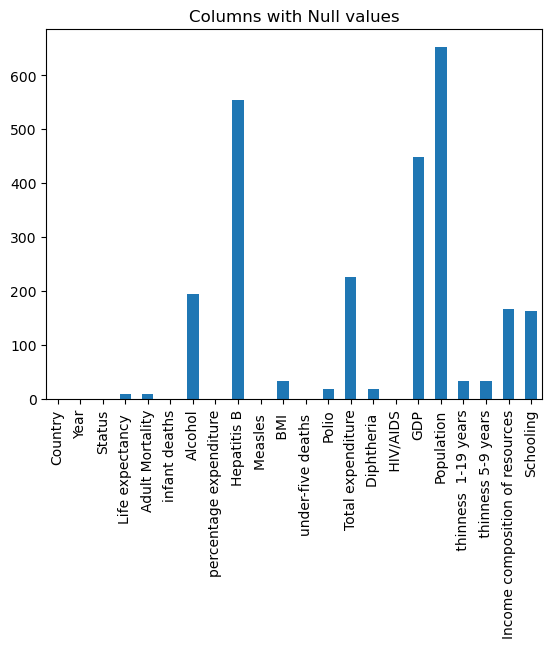

In [140]:
df.isna().sum().plot(kind='bar')
plt.title('Columns with Null values')

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [142]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [143]:
le=LE()

In [144]:
df['Country']=le.fit_transform(df['Country'])

In [145]:
df['Status']=le.fit_transform(df['Status'])

In [146]:
df.columns=[i.strip() for i in df.columns]

In [147]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [148]:
df['Life expectancy'].median()

72.1

In [149]:
df.fillna(df.median(),inplace=True)

In [150]:
df.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [151]:
#Check the distribution of the dataset

array([[<AxesSubplot:title={'center':'Country'}>,
        <AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Status'}>,
        <AxesSubplot:title={'center':'Life expectancy'}>,
        <AxesSubplot:title={'center':'Adult Mortality'}>],
       [<AxesSubplot:title={'center':'infant deaths'}>,
        <AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'percentage expenditure'}>,
        <AxesSubplot:title={'center':'Hepatitis B'}>,
        <AxesSubplot:title={'center':'Measles'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'under-five deaths'}>,
        <AxesSubplot:title={'center':'Polio'}>,
        <AxesSubplot:title={'center':'Total expenditure'}>,
        <AxesSubplot:title={'center':'Diphtheria'}>],
       [<AxesSubplot:title={'center':'HIV/AIDS'}>,
        <AxesSubplot:title={'center':'GDP'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'thinn

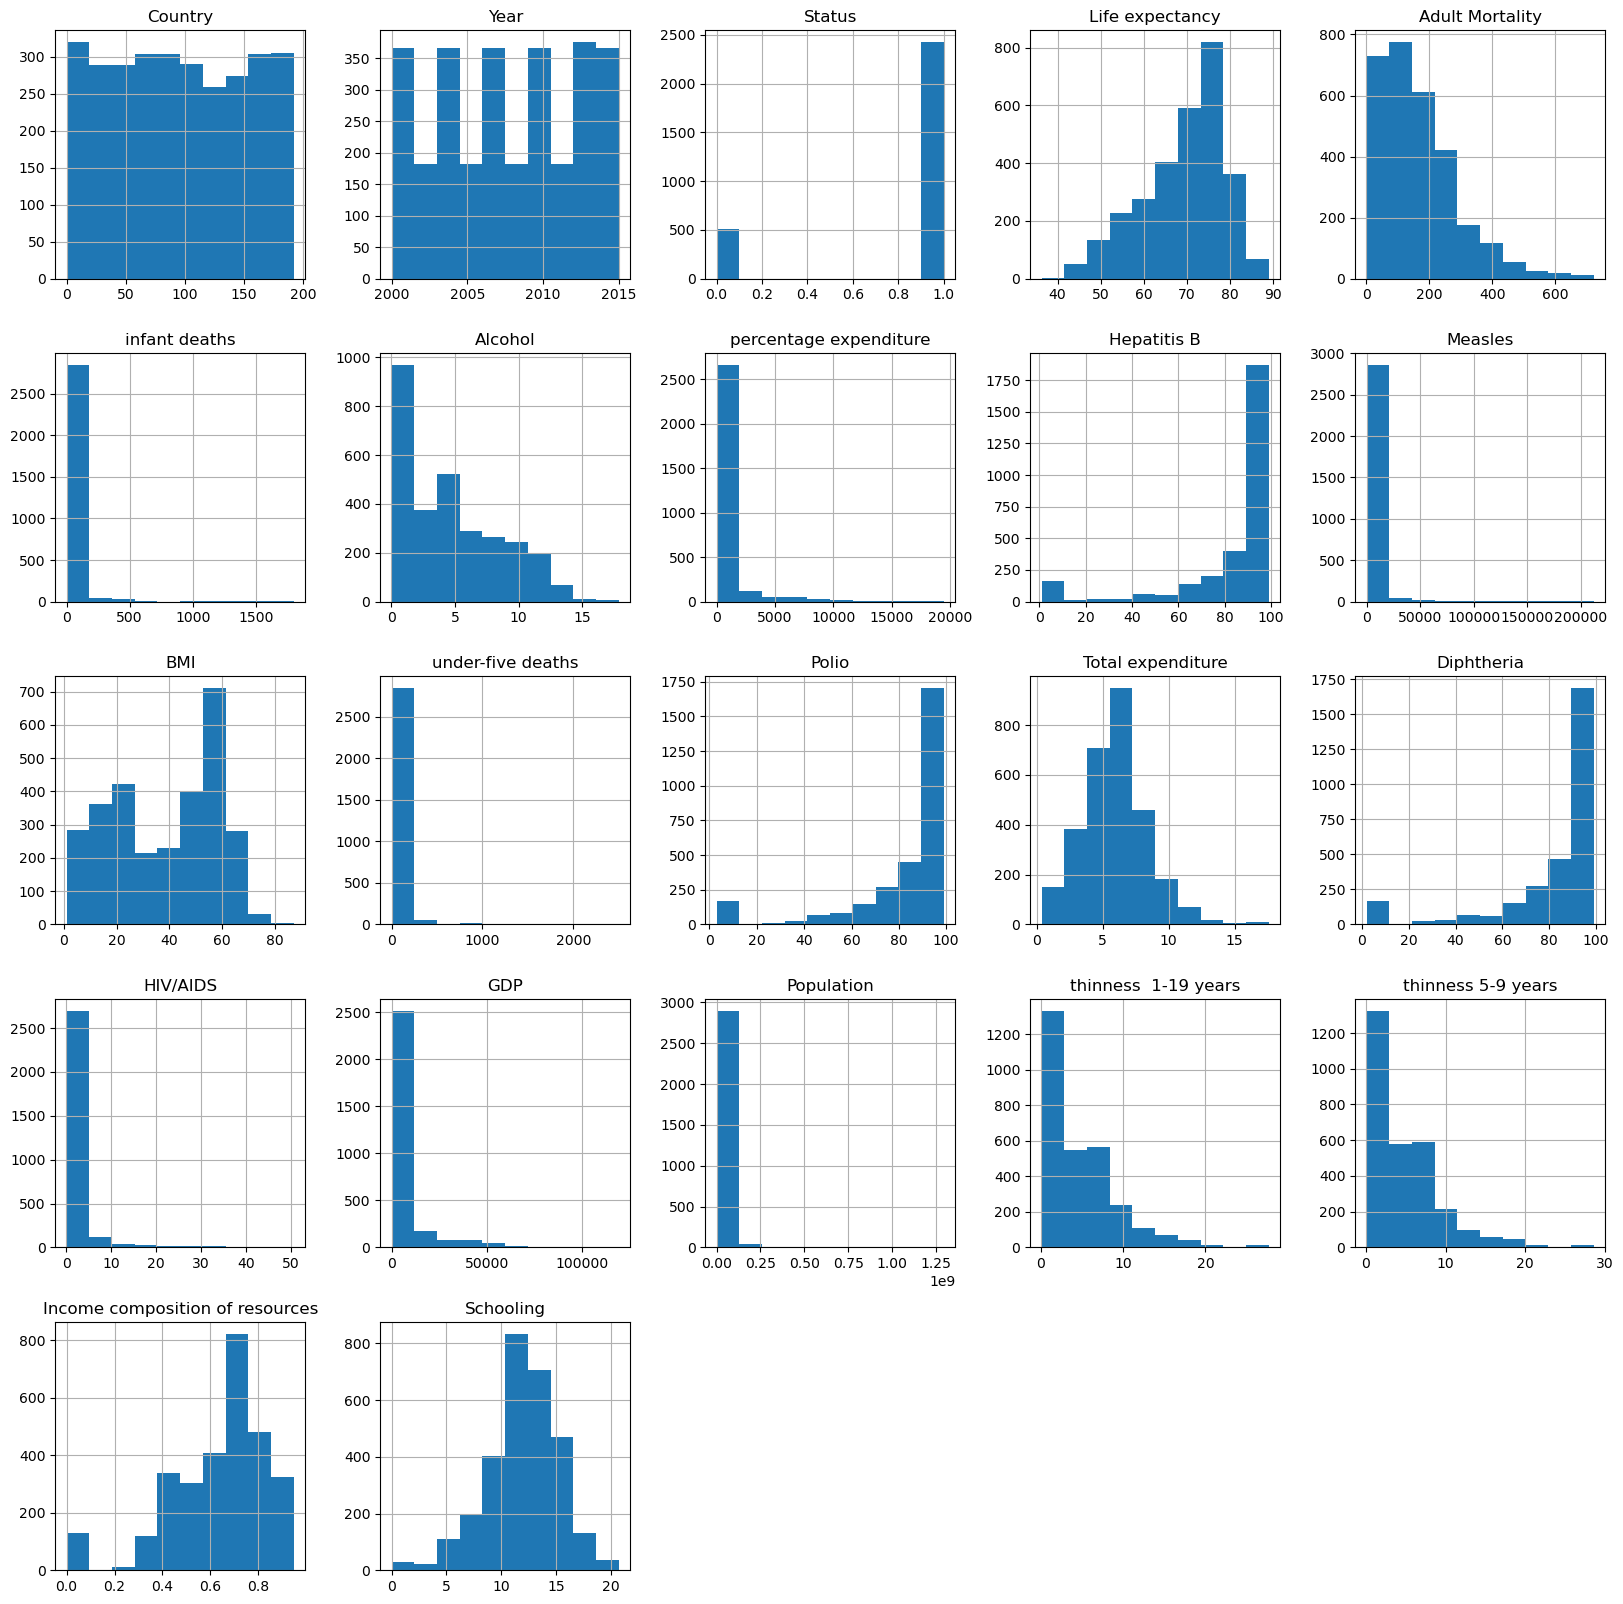

In [152]:
df.hist(figsize=(20,20))

Text(0.5, 1.0, 'Cardinality Plot')

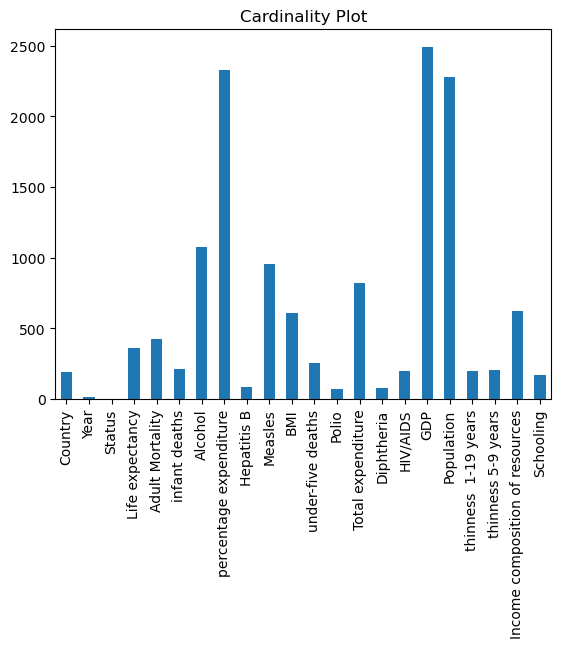

In [153]:
df.nunique().plot(kind='bar')
plt.title("Cardinality Plot")

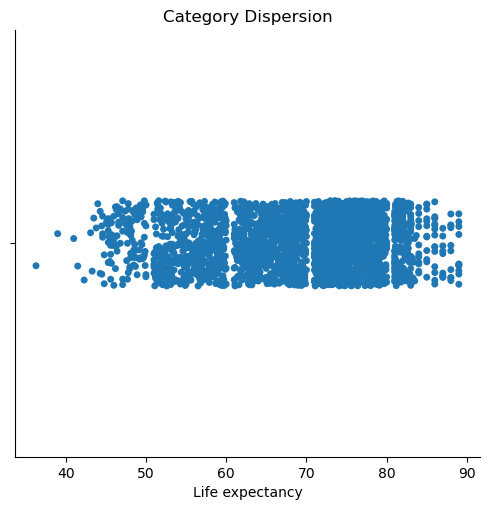

In [154]:
sns.catplot(x=df.columns[3], data=df.iloc[:, 2:7])
plt.title("Category Dispersion")
plt.show()

<AxesSubplot:xlabel='Life expectancy', ylabel='Density'>

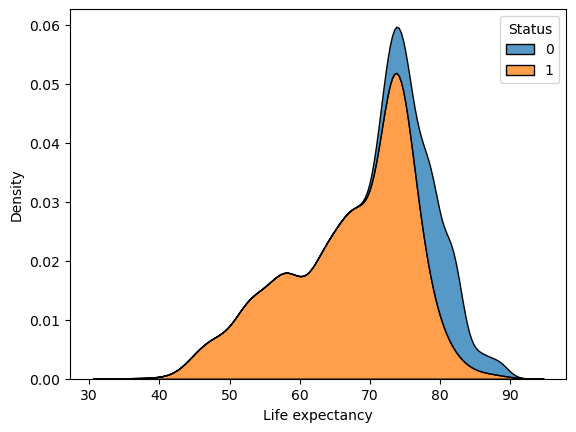

In [155]:
sns.kdeplot(data=df,hue='Status',x='Life expectancy',multiple='stack')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot of Life expectancy')

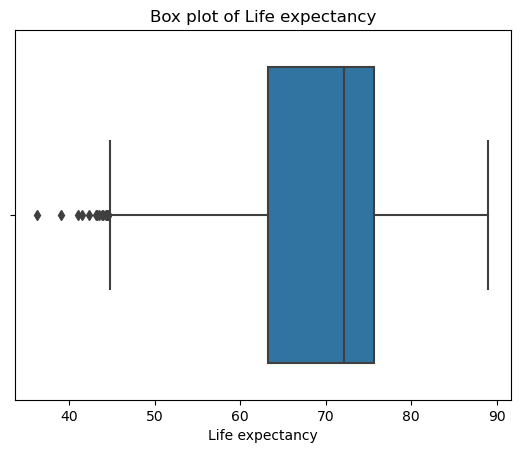

In [156]:
sns.boxplot(df['Life expectancy'])
plt.title('Box plot of Life expectancy')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box plot of Population')

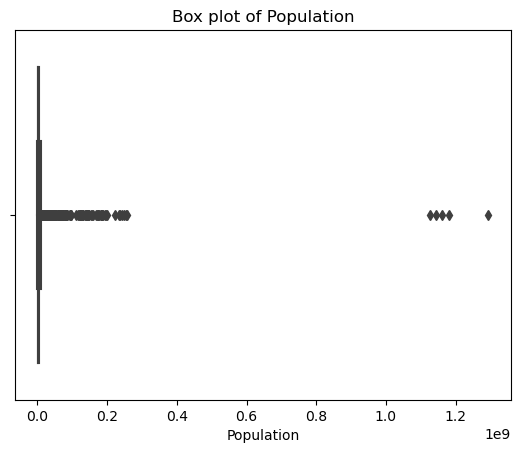

In [157]:
sns.boxplot(df['Population'])
plt.title('Box plot of Population')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of BMI')

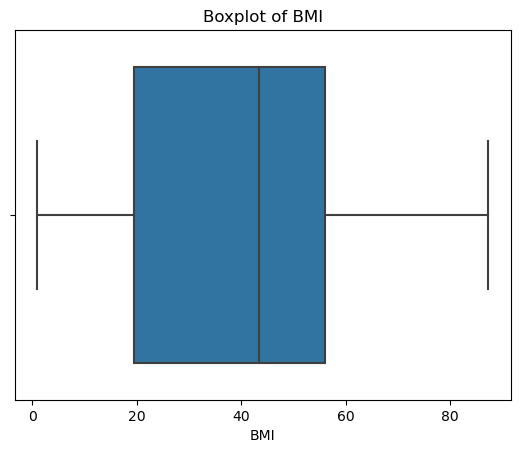

In [158]:
sns.boxplot(df['BMI'])
plt.title('Boxplot of BMI')

In [159]:
#Scaling

In [160]:
mn=MN()

In [161]:
x=df.drop('Life expectancy',axis=1)
y=df['Life expectancy']

In [162]:
x.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [163]:
y.head()

0    65.0
1    59.9
2    59.9
3    59.5
4    59.2
Name: Life expectancy, dtype: float64

In [164]:
x=mn.fit_transform(x)

In [165]:
x

array([[0.        , 1.        , 1.        , ..., 0.60350877, 0.50527426,
        0.48792271],
       [0.        , 0.93333333, 1.        , ..., 0.61052632, 0.5021097 ,
        0.48309179],
       [0.        , 0.86666667, 1.        , ..., 0.61754386, 0.49578059,
        0.47826087],
       ...,
       [1.        , 0.13333333, 1.        , ..., 0.04210526, 0.45042194,
        0.48309179],
       [1.        , 0.06666667, 1.        , ..., 0.05614035, 0.45042194,
        0.47342995],
       [1.        , 0.        , 1.        , ..., 0.38947368, 0.45780591,
        0.47342995]])

In [166]:
x.max()

1.0000000000000002

In [167]:
x.shape

(2938, 21)

In [168]:
x=x[:,0:1]

In [169]:
x.shape

(2938, 1)

In [170]:
#Train_Test_Split

In [171]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [172]:
len(x_train),len(y_train)

(2056, 2056)

Text(0.5, 1.0, 'Correlation Matrix')

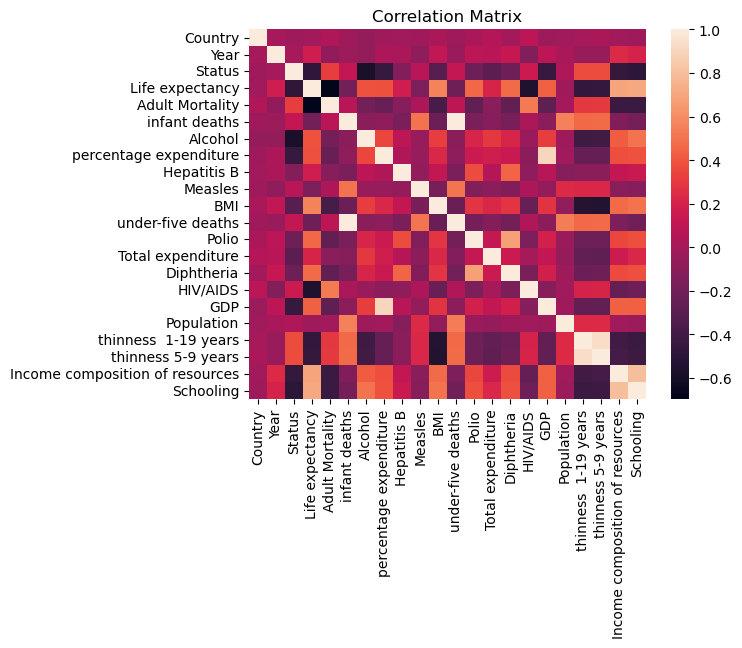

In [173]:
sns.heatmap(df.corr())
plt.title('Correlation Matrix')

In [174]:
#Performing Linear Regression/Multi-Linear

In [175]:
lr=LR()

In [176]:
lr.fit(x_train,y_train)

LinearRegression()

In [177]:
print('R^2 Score: ',lr.score(x_test,y_test))

R^2 Score:  -0.001286110136174079


In [178]:
y_preds=lr.predict(x_test)

In [179]:
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_preds))
print('Mean Square Error: ',metrics.mean_squared_error(y_test,y_preds))
print('Root Mean Square Error:',metrics.mean_squared_error(y_test,y_preds)**0.5)
print('Mean Absolute Percentage Error: ',metrics.mean_absolute_percentage_error(y_test,y_preds))

Mean Absolute Error:  7.711921626865064
Mean Square Error:  91.42824648108169
Root Mean Square Error: 9.561811882749089
Mean Absolute Percentage Error:  0.12010654258682871
